In [41]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import binomial
import math
import sys
sys.setrecursionlimit(10000)

In [171]:
class Wright_Fisher():
    
    def __init__(self, Pop_size, P_A, P_B,generation, u = None, v = None):
        self.Pop_size = Pop_size
        self.P_A = P_A
        self.P_B = P_B
        self.evo_freq_A = []
        self.evo_freq_B = []
        self.evo_pop_A = []
        self.evo_pop_B = []
        self.evo_pop_size = []
        self.generation = generation
        self.u = u if u is not None else 0
        self.v = v if v is not None else 0
    
    def pop_evolution_stable(self, Pop_size, P_A, P_B, generation):
            
        if P_A > 0 and P_B > 0 and Pop_size != 0 and generation != 0:
            generation -= 1
            
            self.evo_pop_size.append(Pop_size)
            
            self.evo_freq_A.append(P_A)
            self.evo_freq_B.append(P_B)

            self.evo_pop_A.append(math.floor(P_A*Pop_size))
            self.evo_pop_B.append(math.floor(P_B*Pop_size))


            new_pop = binomial(1,P_A,Pop_size)

            new_A_ind = sum(new_pop==1)
            new_B_ind = sum(new_pop==0)

            new_P_A = new_A_ind/Pop_size
            new_P_B = new_B_ind/Pop_size

            new_pop[0:int(new_P_A*Pop_size)] = 1

            self.pop_evolution_stable(Pop_size, new_P_A, new_P_B, generation)


    def pop_evolution_dynamic(self, Pop_size, P_A, P_B, generation):
        
    
        if P_A > 0 and P_B > 0 and Pop_size != 0 and generation != 0:

            generation -= 1
            
            self.evo_pop_size.append(Pop_size)

            self.evo_freq_A.append(P_A)
            self.evo_freq_B.append(P_B)

            self.evo_pop_A.append(math.floor(P_A*Pop_size))
            self.evo_pop_B.append(math.floor(P_B*Pop_size))

            pop_evo = np.random.normal(0, 1, Pop_size)
            pop_evo_factor = sum(pop_evo)

            if Pop_size+math.floor(pop_evo_factor) >0 :

                new_pop = np.zeros(Pop_size+math.floor(pop_evo_factor))

                new_pop_size = len(new_pop)
                
                Pop_size = new_pop_size

                new_pop = binomial(1,P_A, Pop_size)

                new_A_ind = sum(new_pop==1)
                new_B_ind = sum(new_pop==0)

                new_P_A = new_A_ind/Pop_size
                new_P_B = new_B_ind/Pop_size
                
                new_pop[0:int(new_P_A*Pop_size)] = 1

                self.pop_evolution_dynamic(new_pop_size, new_P_A, new_P_B, generation)
    
    def pop_evolution_stable_mutation(self, Pop_size, P_A, P_B, u, v, generation):
    
        if P_A > 0 and P_B > 0 and Pop_size > 0 and generation != 0:
            
            generation -= 1
            
            self.evo_pop_size.append(Pop_size)

            self.evo_freq_A.append(P_A)
            self.evo_freq_B.append(P_B)

            self.evo_pop_A.append(math.floor(P_A*Pop_size))
            self.evo_pop_B.append(math.floor(P_B*Pop_size))

            new_pop = binomial(1,P_A,Pop_size)

            new_A_ind = sum(new_pop==1)
            new_B_ind = sum(new_pop==0)

            mutated_A_ind_to_B = new_A_ind * u
            mutated_B_ind_to_A = new_B_ind * v

            new_P_A = (new_A_ind-mutated_A_ind_to_B +mutated_B_ind_to_A)/Pop_size
            new_P_B = (new_B_ind-mutated_B_ind_to_A+mutated_A_ind_to_B)/Pop_size

            new_pop[0:int(new_P_A*Pop_size)] = 1

            self.pop_evolution_stable_mutation(Pop_size, new_P_A, new_P_B, u, v, generation)

    
    def pop_evolution_dynamic_mutation(self, Pop_size, P_A, P_B, u, v,generation):
    
        if P_A > 0 and P_B > 0 and Pop_size != 0 and generation != 0:
            
            generation -= 1
            self.evo_pop_size.append(Pop_size)

            self.evo_freq_A.append(P_A)
            self.evo_freq_B.append(P_B)

            self.evo_pop_A.append(math.floor(P_A*Pop_size))
            self.evo_pop_B.append(math.floor(P_B*Pop_size))

            pop_evo = np.random.normal(0, 1, Pop_size)
            pop_evo_factor = sum(pop_evo)

            if Pop_size+math.floor(pop_evo_factor) >0 :

                new_pop = np.zeros(Pop_size+math.floor(pop_evo_factor))

                new_pop_size = len(new_pop)
                
                Pop_size = new_pop_size

                new_pop = binomial(1,P_A, Pop_size)

                new_A_ind = sum(new_pop==1)
                new_B_ind = sum(new_pop==0)

                mutated_A_ind_to_B = new_A_ind * u
                mutated_B_ind_to_A = new_B_ind * v

                new_P_A = (new_A_ind-mutated_A_ind_to_B +mutated_B_ind_to_A)/Pop_size
                new_P_B = (new_B_ind-mutated_B_ind_to_A+mutated_A_ind_to_B)/Pop_size
                
                new_pop[0:int(new_P_A*self.Pop_size)] = 1

                self.pop_evolution_dynamic_mutation(new_pop_size, new_P_A, new_P_B, u, v, generation)
            

    def plot_all_pop(self):
        
        plt.plot(self.evo_pop_A, label = 'Pop A')
        plt.plot(self.evo_pop_B, label = 'Pop B')
        plt.plot(self.evo_pop_size, label = 'Tot pop')
        plt.legend()
        plt.title("Population evolution of A and B with allele frequency of A: "+str(self.P_A)+" and mutations u: "+str(self.u)+" , v: "+str(self.v))
        plt.xlabel("Number of generations")
        plt.ylabel("Population size")
        
    def plot_alleles_A_pop(self):
        
        plt.plot(self.evo_pop_A, label = 'Pop A')
        plt.legend()
        plt.title("Population evolution of A")
        plt.xlabel("Number of generations")
        plt.ylabel("Population size")
        
    def plot_alleles_B_pop(self):
        
        plt.plot(self.evo_pop_B, label = 'Pop B')
        plt.legend()
        plt.title("Population evolution of B")
        plt.xlabel("Number of generations")
        plt.ylabel("Population size")
        
    def plot_all_freq(self):

        plt.plot(self.evo_freq_A, label = 'Pop A')
        plt.plot(self.evo_freq_B, label = 'Pop B')
        plt.legend()
        plt.title("Frequency evolution of A and B with allele frequency of A: "+str(self.P_A)+" and mutations u: "+str(self.u)+" , v: "+str(self.v))
        plt.xlabel("Number of generations")
        plt.ylabel("Frequency")
        
    def plot_alleles_A_freq(self):
        
        plt.plot(self.evo_freq_A, label = 'Pop A')
        plt.legend()
        plt.title("Frequency evolution of A")
        plt.xlabel("Number of generations")
        plt.ylabel("Frequency size")
        
    def plot_alleles_B_freq(self):
        
        plt.plot(self.evo_freq_B, label = 'Pop B')
        plt.legend()
        plt.title("Frequency evolution of B")
        plt.xlabel("Number of generations")
        plt.ylabel("Frequency size")

<hr>

<h2>Stable 

In [43]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.2 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [44]:
storage_stab_1 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_stable(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
    storage_stab_1[i] = trial.evo_freq_A

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


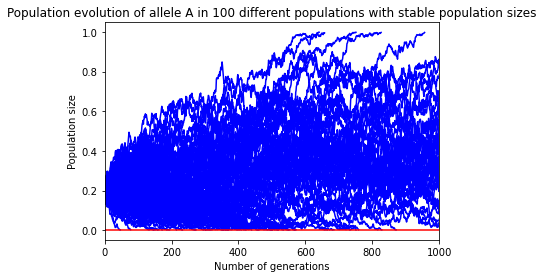

In [45]:
for i, j in enumerate(storage_stab_1.items()):
    plt.plot(storage_stab_1[i], color = 'blue')
plt.xlim([0,1000])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

In [46]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.4 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [47]:
storage_stab_2 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_stable(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
    storage_stab_2[i] = trial.evo_freq_A

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


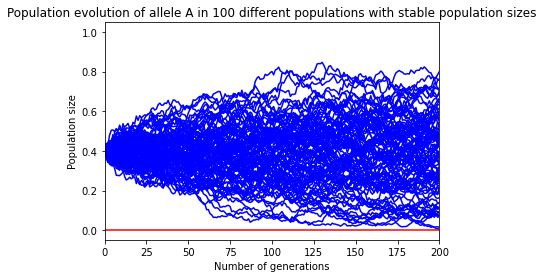

In [48]:
for i, j in enumerate(storage_stab_2.items()):
    plt.plot(storage_stab_2[i], color = 'blue')
plt.xlim([0,200])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

In [49]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.6 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [50]:
storage_stab_3 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_stable(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
    storage_stab_3[i] = trial.evo_freq_A

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


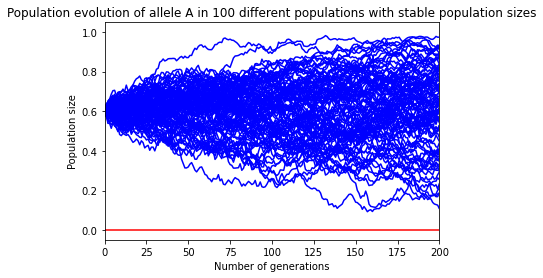

In [51]:
for i, j in enumerate(storage_stab_3.items()):
    plt.plot(storage_stab_3[i], color = 'blue')
plt.xlim([0,200])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

In [52]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.8 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [53]:
storage_stab_4 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_stable(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
    storage_stab_4[i] = trial.evo_freq_A

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


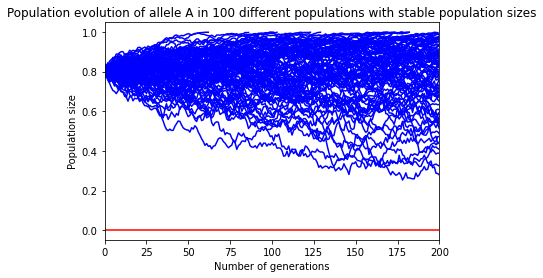

In [54]:
for i, j in enumerate(storage_stab_4.items()):
    plt.plot(storage_stab_4[i], color = 'blue')
plt.xlim([0,200])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

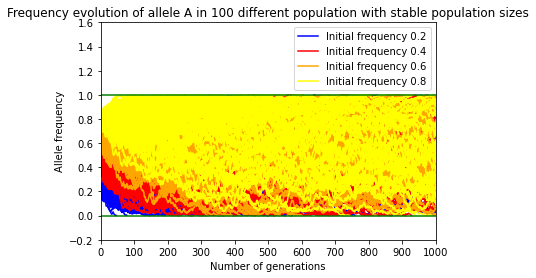

In [55]:
for i, j in storage_stab_1.items():
    plt.plot(storage_stab_1[i], color = 'blue')
plt.plot(storage_stab_1[0], color = 'blue', label = "Initial frequency 0.2")

for i, j in storage_stab_2.items():
    plt.plot(storage_stab_2[i], color = 'Red')
plt.plot(storage_stab_2[0], color = 'Red', label = "Initial frequency 0.4")

for i, j in storage_stab_3.items():
    plt.plot(storage_stab_3[i], color = 'Orange')
plt.plot(storage_stab_3[0], color = 'Orange', label = "Initial frequency 0.6")

for i, j in storage_stab_4.items():
    plt.plot(storage_stab_4[i], color = 'Yellow')
plt.plot(storage_stab_4[0], color = 'Yellow', label = "Initial frequency 0.8")

plt.title("Frequency evolution of allele A in 100 different population with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Allele frequency")

plt.xlim([0,1000])
plt.xticks(np.arange(0,1001,100))
plt.ylim([-0.2,1.6])
plt.axhline(y=1, color='g', linestyle='-')
plt.axhline(y=0, color='g', linestyle='-')

plt.legend()

<h2>Dynamique 

In [56]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.2 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [59]:
storage_dyn_1 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_dynamic(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
    storage_dyn_1[i] = trial.evo_freq_A

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


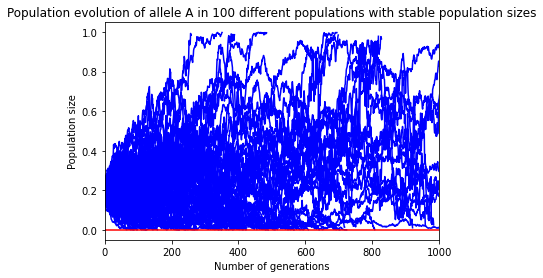

In [60]:
for i, j in enumerate(storage_dyn_1.items()):
    plt.plot(storage_dyn_1[i], color = 'blue')
plt.xlim([0,1000])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

In [61]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.4 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [62]:
storage_dyn_2 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_dynamic(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
    storage_dyn_2[i] = trial.evo_freq_A

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


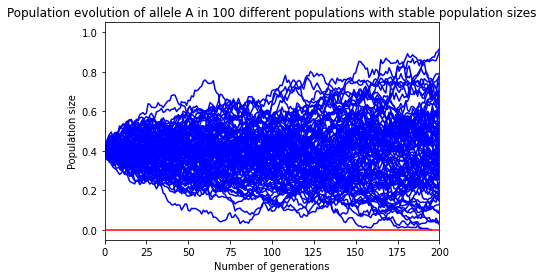

In [63]:
for i, j in enumerate(storage_dyn_2.items()):
    plt.plot(storage_dyn_2[i], color = 'blue')
plt.xlim([0,200])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

In [64]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.6 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [65]:
storage_dyn_3 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_dynamic(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
    storage_dyn_3[i] = trial.evo_freq_A

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


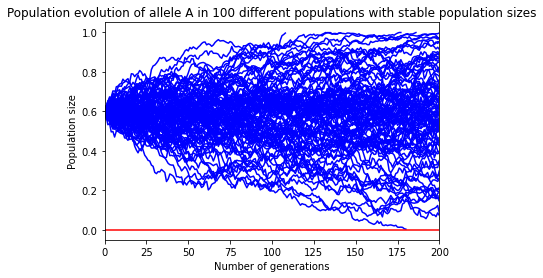

In [66]:
for i, j in enumerate(storage_dyn_3.items()):
    plt.plot(storage_dyn_3[i], color = 'blue')
plt.xlim([0,200])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

In [67]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.8 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [68]:
storage_dyn_4 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_dynamic(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
    storage_dyn_4[i] = trial.evo_freq_A

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


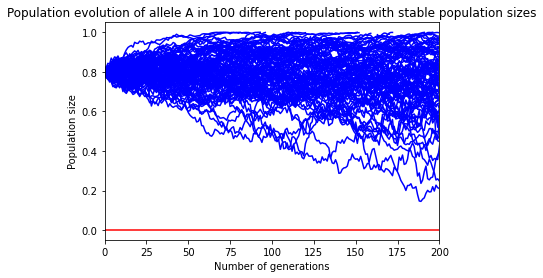

In [69]:
for i, j in enumerate(storage_dyn_4.items()):
    plt.plot(storage_dyn_4[i], color = 'blue')
plt.xlim([0,200])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

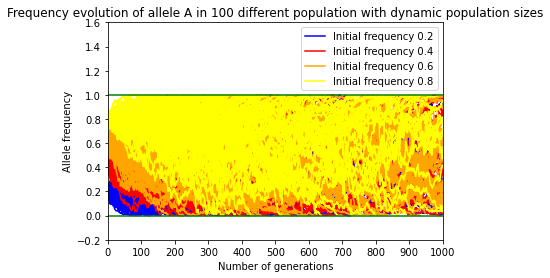

In [70]:
for i, j in storage_dyn_1.items():
    plt.plot(storage_dyn_1[i], color = 'blue')
plt.plot(storage_dyn_1[0], color = 'blue', label = "Initial frequency 0.2")

for i, j in storage_dyn_2.items():
    plt.plot(storage_dyn_2[i], color = 'Red')
plt.plot(storage_dyn_2[0], color = 'Red', label = "Initial frequency 0.4")

for i, j in storage_dyn_3.items():
    plt.plot(storage_dyn_3[i], color = 'Orange')
plt.plot(storage_dyn_3[0], color = 'Orange', label = "Initial frequency 0.6")

for i, j in storage_dyn_4.items():
    plt.plot(storage_dyn_4[i], color = 'Yellow')
plt.plot(storage_dyn_4[0], color = 'Yellow', label = "Initial frequency 0.8")

plt.title("Frequency evolution of allele A in 100 different population with dynamic population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Allele frequency")

plt.xlim([0,1000])
plt.xticks(np.arange(0,1001,100))
plt.ylim([-0.2,1.6])
plt.axhline(y=1, color='g', linestyle='-')
plt.axhline(y=0, color='g', linestyle='-')

plt.legend()

<h2>Stable avec mutations

In [145]:
N = 1000 #starting population

u = 0.2 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [146]:
storage_stab_mut_1 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_stable_mutation(trial.Pop_size, trial.P_A, trial.P_B, u, v, trial.generation)
    storage_stab_mut_1[i] = trial.evo_freq_A

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


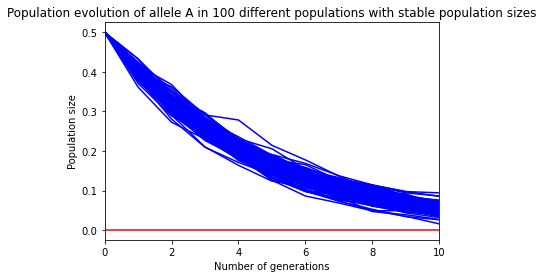

In [147]:
for i, j in enumerate(storage_stab_mut_1.items()):
    plt.plot(storage_stab_mut_1[i], color = 'blue')
plt.xlim([0,10])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

In [148]:
N = 1000 #starting population

u = 0.4 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [149]:
storage_stab_mut_2 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_stable_mutation(trial.Pop_size, trial.P_A, trial.P_B, u, v, trial.generation)
    storage_stab_mut_2[i] = trial.evo_freq_A

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


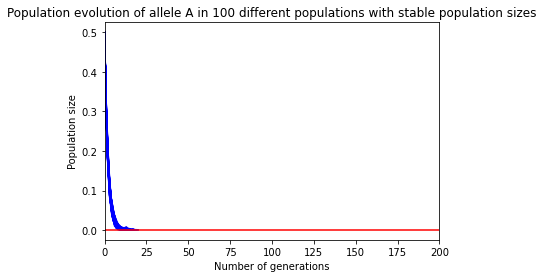

In [150]:
for i, j in enumerate(storage_stab_mut_2.items()):
    plt.plot(storage_stab_mut_2[i], color = 'blue')
plt.xlim([0,200])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

In [151]:
N = 1000 #starting population

u = 0.6 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [152]:
storage_stab_mut_3 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_stable_mutation(trial.Pop_size, trial.P_A, trial.P_B, u, v, trial.generation)
    storage_stab_mut_3[i] = trial.evo_freq_A

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


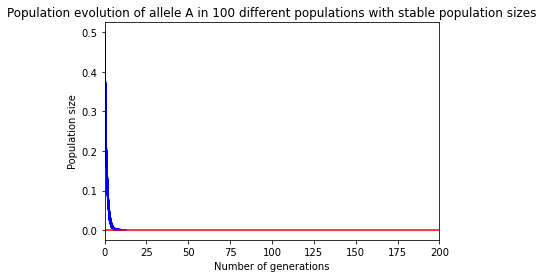

In [153]:
for i, j in enumerate(storage_stab_mut_3.items()):
    plt.plot(storage_stab_mut_3[i], color = 'blue')
plt.xlim([0,200])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

In [154]:
N = 1000 #starting population

u = 0.8 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [155]:
storage_stab_mut_4 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_stable_mutation(trial.Pop_size, trial.P_A, trial.P_B, u, v, trial.generation)
    storage_stab_mut_4[i] = trial.evo_freq_A

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


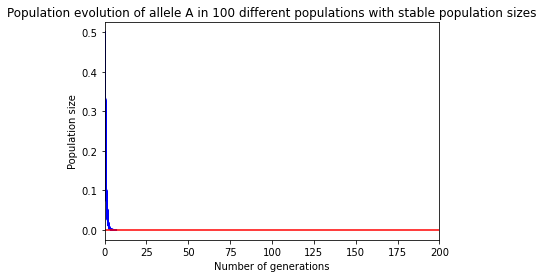

In [156]:
for i, j in enumerate(storage_stab_mut_4.items()):
    plt.plot(storage_stab_mut_4[i], color = 'blue')
plt.xlim([0,200])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

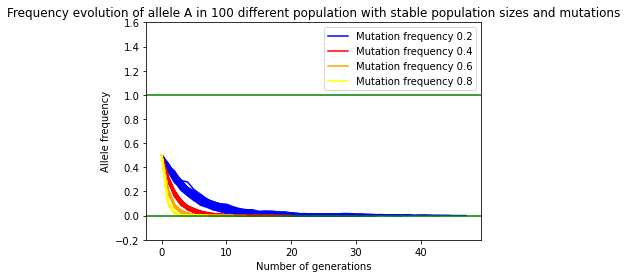

In [157]:
for i, j in storage_stab_mut_1.items():
    plt.plot(storage_stab_mut_1[i], color = 'blue')
plt.plot(storage_stab_mut_1[0], color = 'blue', label = "Mutation frequency 0.2")

for i, j in storage_stab_mut_2.items():
    plt.plot(storage_stab_mut_2[i], color = 'Red')
plt.plot(storage_stab_mut_2[0], color = 'Red', label = "Mutation frequency 0.4")

for i, j in storage_stab_mut_3.items():
    plt.plot(storage_stab_mut_3[i], color = 'Orange')
plt.plot(storage_stab_mut_3[0], color = 'Orange', label = "Mutation frequency 0.6")

for i, j in storage_stab_mut_4.items():
    plt.plot(storage_stab_mut_4[i], color = 'Yellow')
plt.plot(storage_stab_mut_4[0], color = 'Yellow', label = "Mutation frequency 0.8")

plt.title("Frequency evolution of allele A in 100 different population with stable population sizes and mutations")
plt.xlabel("Number of generations")
plt.ylabel("Allele frequency")


plt.ylim([-0.2,1.6])
plt.axhline(y=1, color='g', linestyle='-')
plt.axhline(y=0, color='g', linestyle='-')

plt.legend()

<h2>Dynamique avec mutations 

In [158]:
N = 1000 #starting population

u = 0.2 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [159]:
storage_dyn_mut_1 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_dynamic_mutation(trial.Pop_size, trial.P_A, trial.P_B, u, v, trial.generation)
    storage_dyn_mut_1[i] = trial.evo_freq_A

0
1000
976
927
941
982
999
986
978
953
947
919
967
1014
1019
1074
1061
1093
1132
1150
1163
1111
1137
1158
1150
1
1000
990
967
914
929
976
939
970
984
949
959
949
956
966
926
914
907
857
857
857
850
830
2
1000
959
949
990
974
1002
1018
1029
1033
1004
950
970
1011
984
997
960
940
981
984
972
1052
1012
3
1000
997
973
984
957
951
922
920
965
957
971
948
911
898
842
849
846
801
789
810
755
735
762
758
760
793
834
4
1000
1011
973
906
875
876
848
850
846
840
888
884
906
883
866
827
786
767
5
1000
966
962
923
936
955
943
893
895
912
934
889
932
865
870
884
869
853
924
902
915
846
845
798
6
1000
997
1037
1064
1048
1062
1088
1090
1097
1085
1053
1121
1184
1140
1131
1166
1164
1229
1236
1232
1200
1227
1246
1190
1247
1283
1279
1254
1226
1265
7
1000
984
1023
1061
1068
1056
1111
1202
1150
1151
1134
1124
1123
1124
1113
1089
1096
1137
1143
1137
1124
1140
1186
8
1000
982
1033
1059
1065
1066
1077
1055
988
990
939
991
977
965
975
975
956
917
910
905
918
877
916
9
1000
1004
978
938
937
948
938
975
962
950
9

966
949
927
970
1004
995
1061
1076
65
1000
1053
980
975
966
1012
1000
1034
1047
1009
1029
1047
1036
950
993
1005
1006
1020
1005
1020
956
949
976
993
951
940
885
915
66
1000
1000
995
971
988
929
913
899
842
882
900
933
932
878
910
866
846
823
846
887
897
910
892
858
836
866
902
67
1000
1023
1028
998
1042
1013
986
1037
998
947
942
952
931
924
920
891
933
919
919
951
976
996
989
965
68
1000
1070
1091
1031
1066
1038
1078
1108
1128
1115
1139
1113
1081
1082
1138
1097
1139
1176
1062
1044
1060
1077
1123
1140
1132
1127
1147
1201
1187
1168
1104
1094
1060
1060
69
1000
972
1005
1002
1010
1025
1064
1033
989
937
959
968
940
954
981
987
981
1006
968
925
867
845
837
70
1000
977
972
966
985
966
932
952
949
972
966
953
961
943
927
949
978
992
965
896
885
798
824
757
748
729
758
718
685
71
1000
964
998
956
954
964
1033
1064
1021
1060
1090
1098
1154
1176
1228
1247
1299
1313
1280
1285
1237
1313
1340
1385
1345
1363
1336
1367
1427
1455
1471
1485
1486
72
1000
975
996
970
1003
1080
1051
1035
1032
993
1001
1000

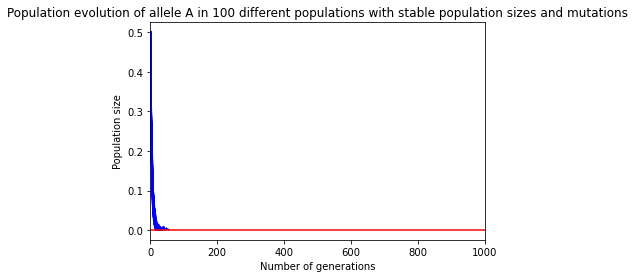

In [160]:
for i, j in enumerate(storage_dyn_mut_1.items()):
    plt.plot(storage_dyn_mut_1[i], color = 'blue')
plt.xlim([0,1000])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes and mutations")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

In [161]:
N = 1000 #starting population

u = 0.4 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [162]:
storage_dyn_mut_2 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_dynamic_mutation(trial.Pop_size, trial.P_A, trial.P_B, u, v, trial.generation)
    storage_dyn_mut_2[i] = trial.evo_freq_A

0
1000
975
988
985
969
960
934
910
919
907
883
912
908
928
932
897
1
1000
993
936
866
783
794
803
738
736
722
709
719
722
731
2
1000
1007
1005
974
968
927
944
918
923
910
921
885
865
854
871
879
3
1000
986
937
932
996
998
1026
1013
1028
1025
1027
4
1000
999
1036
1074
1124
1125
1115
1098
1130
1160
1205
1265
1241
1306
5
1000
1022
1102
1092
1097
1105
1106
1141
1154
1139
1088
1075
1071
1071
6
1000
1041
1023
1032
996
964
986
1025
999
1013
1019
1078
1051
7
1000
959
950
989
1028
1090
1124
1116
1064
1042
1131
8
1000
996
1020
963
982
997
1005
990
979
929
950
917
918
914
937
910
9
1000
996
989
930
907
893
864
886
862
876
899
831
825
849
876
10
1000
999
1011
938
944
960
912
913
924
842
842
859
831
11
1000
1033
1061
1032
1016
1048
1053
1048
981
937
906
905
911
896
889
852
807
12
1000
994
1027
1030
983
944
890
861
850
831
813
771
785
830
13
1000
949
943
906
918
919
894
907
894
827
822
820
776
744
766
822
14
1000
970
1035
1052
1061
1048
1054
1057
1014
1022
1044
1013
996
970
1022
1038
1030
1063
1096


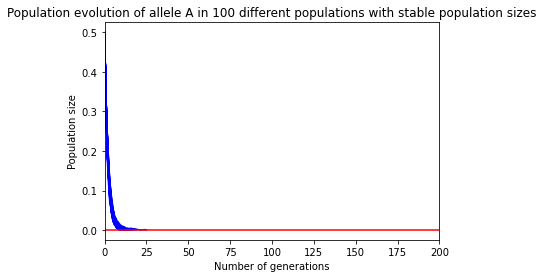

In [163]:
for i, j in enumerate(storage_dyn_mut_2.items()):
    plt.plot(storage_dyn_mut_2[i], color = 'blue')
plt.xlim([0,200])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

In [164]:
N = 1000 #starting population

u = 0.6 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [165]:
storage_dyn_mut_3 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_dynamic_mutation(trial.Pop_size, trial.P_A, trial.P_B, u, v, trial.generation)
    storage_dyn_mut_3[i] = trial.evo_freq_A

0
1000
985
1016
1006
1032
1057
1049
1006
1018
1
1000
963
943
938
925
952
925
930
971
957
970
2
1000
980
997
1007
945
941
939
958
974
3
1000
1011
1078
1055
1087
1058
1027
1097
1088
1066
4
1000
1068
1142
1117
1130
1146
1192
1182
1199
1165
1188
5
1000
919
905
867
833
870
824
781
742
6
1000
1013
970
959
957
943
927
948
930
878
7
1000
1032
1029
1073
1092
1019
1017
965
1037
8
1000
1022
1033
1063
1037
1061
1071
1074
9
1000
933
867
917
882
866
905
892
10
1000
995
1023
965
945
911
910
881
835
11
1000
1024
1026
1076
1081
1127
1117
1064
1093
1095
1116
12
1000
1067
1045
1033
1025
1026
1056
1088
1107
13
1000
966
971
936
930
928
935
966
970
14
1000
1023
1092
1122
1147
1064
1040
989
1052
15
1000
1003
1032
1098
1109
1105
1082
1108
1099
1087
16
1000
1044
1089
1078
1088
1083
1053
1050
997
17
1000
993
1019
1061
1108
1118
1086
1057
1041
1064
18
1000
991
1042
992
964
933
891
902
858
19
1000
938
952
969
922
928
952
939
864
20
1000
993
1030
1037
1037
1080
1053
1056
1031
21
1000
986
1017
1066
1136
1101
1073
1

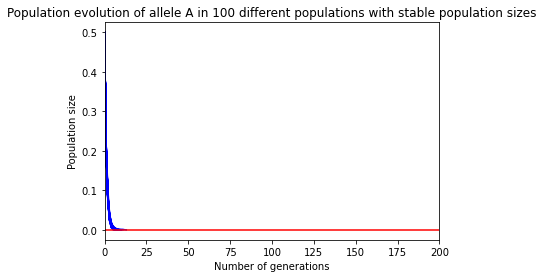

In [166]:
for i, j in enumerate(storage_dyn_mut_3.items()):
    plt.plot(storage_dyn_mut_3[i], color = 'blue')
plt.xlim([0,200])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

In [167]:
N = 1000 #starting population

u = 0.8 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

In [168]:
storage_dyn_mut_4 = {}

for i in range(100):
    print(i)
    trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
    trial.pop_evolution_dynamic_mutation(trial.Pop_size, trial.P_A, trial.P_B, u, v, trial.generation)
    storage_dyn_mut_4[i] = trial.evo_freq_A

0
1000
1003
1023
968
936
925
1
1000
978
1011
1007
969
905
2
1000
1036
1053
1055
1066
1051
3
1000
1023
1056
1065
1015
966
943
4
1000
999
994
984
952
965
5
1000
982
952
927
940
929
911
859
6
1000
964
1035
1050
1025
1032
1014
7
1000
927
892
902
928
922
932
8
1000
1013
1039
1003
941
944
913
9
1000
957
933
952
920
893
10
1000
964
953
1009
973
977
11
1000
941
982
974
1028
1046
12
1000
985
963
993
985
951
921
989
13
1000
997
991
1020
989
942
14
1000
997
1002
990
951
964
15
1000
995
986
992
1000
995
1031
16
1000
982
1037
1093
1112
1165
17
1000
981
966
997
967
972
988
18
1000
1008
1068
1119
1113
1129
1100
19
1000
1010
995
1006
944
997
975
20
1000
971
994
1014
1039
1050
1067
21
1000
950
929
955
947
958
903
22
1000
1025
1040
1045
1080
1094
1152
23
1000
972
1002
1066
1046
1037
24
1000
1014
993
955
978
1016
25
1000
952
950
949
941
954
1017
26
1000
986
1016
1019
972
1026
989
958
27
1000
976
942
945
952
966
28
1000
971
987
989
952
972
29
1000
1004
1007
1036
971
997
30
1000
1010
1021
997
1045
1030
31


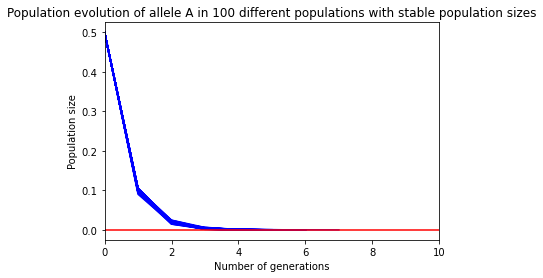

In [169]:
for i, j in enumerate(storage_dyn_mut_4.items()):
    plt.plot(storage_dyn_mut_4[i], color = 'blue')
plt.xlim([0,10])
plt.title("Population evolution of allele A in 100 different populations with stable population sizes")
plt.xlabel("Number of generations")
plt.ylabel("Population size")
plt.axhline(y=0, color='r', linestyle='-')

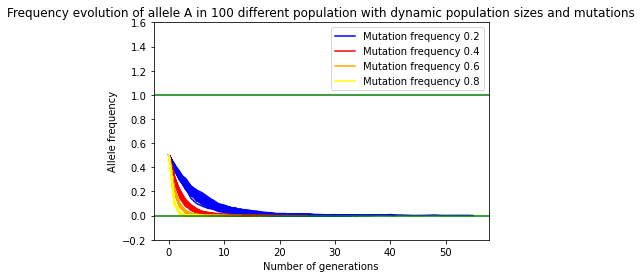

In [170]:
for i, j in storage_dyn_mut_1.items():
    plt.plot(storage_dyn_mut_1[i], color = 'blue')
plt.plot(storage_dyn_mut_1[0], color = 'blue', label = "Mutation frequency 0.2")

for i, j in storage_dyn_mut_2.items():
    plt.plot(storage_dyn_mut_2[i], color = 'Red')
plt.plot(storage_dyn_mut_2[0], color = 'Red', label = "Mutation frequency 0.4")

for i, j in storage_dyn_mut_3.items():
    plt.plot(storage_dyn_mut_3[i], color = 'Orange')
plt.plot(storage_dyn_mut_3[0], color = 'Orange', label = "Mutation frequency 0.6")

for i, j in storage_dyn_mut_4.items():
    plt.plot(storage_dyn_mut_4[i], color = 'Yellow')
plt.plot(storage_dyn_mut_4[0], color = 'Yellow', label = "Mutation frequency 0.8")

plt.title("Frequency evolution of allele A in 100 different population with dynamic population sizes and mutations")
plt.xlabel("Number of generations")
plt.ylabel("Allele frequency")


plt.ylim([-0.2,1.6])
plt.axhline(y=1, color='g', linestyle='-')
plt.axhline(y=0, color='g', linestyle='-')

plt.legend()